In [ ]:
import pandas as pd
import os,sys
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/인공지능의이해/covid_19_data.csv')
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [ ]:
data['Confirmed']

0              1.0
1             14.0
2              6.0
3              1.0
4              0.0
            ...   
306424    102641.0
306425     29147.0
306426      1364.0
306427     87550.0
306428    391559.0
Name: Confirmed, Length: 306429, dtype: float64

In [ ]:
data['Confirmed'][236013]

35360.0

In [ ]:
# data['Confirmed'] 얘랑 같은게 밑에거
data.loc[:,'Confirmed']


0              1.0
1             14.0
2              6.0
3              1.0
4              0.0
            ...   
306424    102641.0
306425     29147.0
306426      1364.0
306427     87550.0
306428    391559.0
Name: Confirmed, Length: 306429, dtype: float64

In [ ]:
data.loc[236013,'Country/Region']

'Ukraine'

In [ ]:
data.loc[236013,['Country/Region','Confirmed']]

Country/Region    Ukraine
Confirmed         35360.0
Name: 236013, dtype: object

In [ ]:
data.loc[236013:236014,['Country/Region','Confirmed']] 

,Country/Region,Confirmed
236013,Ukraine,35360.0
236014,US,2636.0


In [ ]:
cd= data.loc[:,['Confirmed','Deaths']]
cd

,Confirmed,Deaths
0,1.0,0.0
1,14.0,0.0
2,6.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
306424,102641.0,2335.0
306425,29147.0,245.0
306426,1364.0,1.0
306427,87550.0,1738.0


In [ ]:
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [ ]:
#rename
data =data.rename(columns={
    'Country/Region':'country'
})

# 컬럼 없애기
data = data.drop(['Last Update'],axis=1)



In [ ]:
# 컬럼 생성

data['active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']

In [ ]:
data

,SNo,ObservationDate,Province/State,country,Confirmed,Deaths,Recovered,active
0,1,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,2,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0,14.0
2,3,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0,6.0
3,4,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0,1.0
4,5,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,102641.0,2335.0,95289.0,5017.0
306425,306426,05/29/2021,Zeeland,Netherlands,29147.0,245.0,0.0,28902.0
306426,306427,05/29/2021,Zhejiang,Mainland China,1364.0,1.0,1324.0,39.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,87550.0,1738.0,83790.0,2022.0


In [ ]:
data['country'] =='South Korea'

0         False
1         False
2         False
3         False
4         False
          ...  
306424    False
306425    False
306426    False
306427    False
306428    False
Name: country, Length: 306429, dtype: bool

In [ ]:
data.loc[:,'country'] =='South Korea'

0         False
1         False
2         False
3         False
4         False
          ...  
306424    False
306425    False
306426    False
306427    False
306428    False
Name: country, Length: 306429, dtype: bool

In [ ]:
data.loc[data.loc[:,'country'] == 'South Korea']

,SNo,ObservationDate,Province/State,country,Confirmed,Deaths,Recovered,active
37,38,01/22/2020,NaN,South Korea,1.0,0.0,0.0,1.0
77,78,01/23/2020,NaN,South Korea,1.0,0.0,0.0,1.0
125,126,01/24/2020,NaN,South Korea,2.0,0.0,0.0,2.0
168,169,01/25/2020,NaN,South Korea,2.0,0.0,0.0,2.0
216,217,01/26/2020,NaN,South Korea,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...
302749,302750,05/25/2021,NaN,South Korea,137682.0,1940.0,127582.0,8160.0
303514,303515,05/26/2021,NaN,South Korea,138311.0,1943.0,128180.0,8188.0
304279,304280,05/27/2021,NaN,South Korea,138898.0,1946.0,128761.0,8191.0
305044,305045,05/28/2021,NaN,South Korea,139431.0,1951.0,129739.0,7741.0


In [ ]:
 
data.loc[data['country']=='US']

,SNo,ObservationDate,Province/State,country,Confirmed,Deaths,Recovered,active
31,32,01/22/2020,Washington,US,1.0,0.0,0.0,1.0
71,72,01/23/2020,Washington,US,1.0,0.0,0.0,1.0
121,122,01/24/2020,Washington,US,1.0,0.0,0.0,1.0
122,123,01/24/2020,Chicago,US,1.0,0.0,0.0,1.0
164,165,01/25/2020,Washington,US,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
306395,306396,05/29/2021,Virginia,US,675165.0,11160.0,0.0,664005.0
306405,306406,05/29/2021,Washington,US,435849.0,5765.0,0.0,430084.0
306408,306409,05/29/2021,West Virginia,US,161287.0,2792.0,0.0,158495.0
306410,306411,05/29/2021,Wisconsin,US,674003.0,7830.0,0.0,666173.0


In [ ]:
# groupby
data.groupby('country',as_index=False).min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  


,country,SNo,ObservationDate,Confirmed,Deaths,Recovered,active
0,Azerbaijan,2738,02/28/2020,1.0,0.0,0.0,1.0
1,"('St. Martin',)",4771,03/10/2020,2.0,0.0,0.0,2.0
2,Afghanistan,2325,01/01/2021,1.0,0.0,0.0,1.0
3,Albania,4497,01/01/2021,2.0,0.0,0.0,2.0
4,Algeria,2421,01/01/2021,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
224,West Bank and Gaza,9120,01/01/2021,84.0,1.0,17.0,43.0
225,Yemen,13917,01/01/2021,1.0,0.0,0.0,1.0
226,Zambia,6797,01/01/2021,2.0,0.0,0.0,2.0
227,Zimbabwe,7416,01/01/2021,1.0,0.0,0.0,1.0


In [ ]:
data.loc[(data['ObservationDate']=='05/29/2021')&(data['country']=='US')]

,SNo,ObservationDate,Province/State,country,Confirmed,Deaths,Recovered,active
305842,305843,05/29/2021,Alabama,US,543405.0,11146.0,0.0,532259.0
305844,305845,05/29/2021,Alaska,US,70208.0,369.0,0.0,69839.0
305869,305870,05/29/2021,Arizona,US,880466.0,17628.0,0.0,862838.0
305870,305871,05/29/2021,Arkansas,US,341290.0,5830.0,0.0,335460.0
305913,305914,05/29/2021,California,US,3788713.0,63236.0,0.0,3725477.0
305948,305949,05/29/2021,Colorado,US,542405.0,6576.0,0.0,535829.0
305949,305950,05/29/2021,Connecticut,US,347341.0,8238.0,0.0,339103.0
305959,305960,05/29/2021,Delaware,US,108770.0,1661.0,0.0,107109.0
305962,305963,05/29/2021,Diamond Princess cruise ship,US,49.0,0.0,0.0,49.0
305963,305964,05/29/2021,District of Columbia,US,48898.0,1132.0,0.0,47766.0


In [ ]:
data.loc[data['ObservationDate']=='05/29/2021'].groupby('country',as_index =False).sum()

,country,SNo,Confirmed,Deaths,Recovered,active
0,Afghanistan,305665,70111.0,2899.0,57281.0,9931.0
1,Albania,305666,132297.0,2449.0,129215.0,633.0
2,Algeria,305667,128456.0,3460.0,89419.0,35577.0
3,Andorra,305668,13693.0,127.0,13416.0,150.0
4,Angola,305669,34180.0,757.0,27646.0,5777.0
...,...,...,...,...,...,...
190,Vietnam,305832,6908.0,47.0,2896.0,3965.0
191,West Bank and Gaza,305833,307838.0,3492.0,300524.0,3822.0
192,Yemen,305834,6731.0,1319.0,3399.0,2013.0
193,Zambia,305835,94751.0,1276.0,91594.0,1881.0


In [ ]:
data_lastday=data.loc[data['ObservationDate']=='05/29/2021'].groupby('country',as_index =False).sum()

data_lastday

,country,SNo,Confirmed,Deaths,Recovered,active
0,Afghanistan,305665,70111.0,2899.0,57281.0,9931.0
1,Albania,305666,132297.0,2449.0,129215.0,633.0
2,Algeria,305667,128456.0,3460.0,89419.0,35577.0
3,Andorra,305668,13693.0,127.0,13416.0,150.0
4,Angola,305669,34180.0,757.0,27646.0,5777.0
...,...,...,...,...,...,...
190,Vietnam,305832,6908.0,47.0,2896.0,3965.0
191,West Bank and Gaza,305833,307838.0,3492.0,300524.0,3822.0
192,Yemen,305834,6731.0,1319.0,3399.0,2013.0
193,Zambia,305835,94751.0,1276.0,91594.0,1881.0


In [ ]:
import plotly.express as px
data_lastday=data.loc[data['ObservationDate']=='05/29/2021'].groupby('country',as_index =False).sum()

fig=px.bar(data_lastday,
           x='country',
           y=['Deaths','Recovered','active'])
fig.show()

In [ ]:
# groupby
df = pd.DataFrame({
    
    'X1': ['K0', 'K0', 'K0', 'K1', 'K2', 'K2'],
    'X2': ['K0', 'K1', 'K0', 'K1', 'K2', 'K2'],
    'A': [1, 2, 3, 4, 5, 6]
    })
print(df)
df.groupby(['X1'], as_index=False).sum()


   X1  X2  A
0  K0  K0  1
1  K0  K1  2
2  K0  K0  3
3  K1  K1  4
4  K2  K2  5
5  K2  K2  6


,X1,A
0,K0,6
1,K1,4
2,K2,11


In [ ]:
data_lastday=data.loc[data['ObservationDate']=='05/29/2021'].groupby('country',as_index =False).sum()

data_lastday

,country,SNo,Confirmed,Deaths,Recovered,active
0,Afghanistan,305665,70111.0,2899.0,57281.0,9931.0
1,Albania,305666,132297.0,2449.0,129215.0,633.0
2,Algeria,305667,128456.0,3460.0,89419.0,35577.0
3,Andorra,305668,13693.0,127.0,13416.0,150.0
4,Angola,305669,34180.0,757.0,27646.0,5777.0
...,...,...,...,...,...,...
190,Vietnam,305832,6908.0,47.0,2896.0,3965.0
191,West Bank and Gaza,305833,307838.0,3492.0,300524.0,3822.0
192,Yemen,305834,6731.0,1319.0,3399.0,2013.0
193,Zambia,305835,94751.0,1276.0,91594.0,1881.0


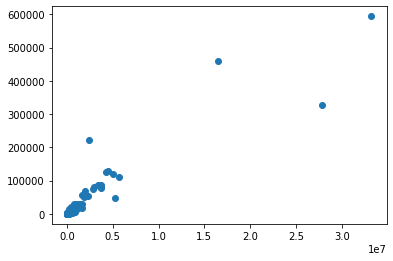

In [ ]:
# the correlation between Confirmed, Death
import matplotlib.pyplot as plt

plt.scatter(data_lastday['Confirmed'],data_lastday['Deaths'])


In [ ]:
import plotly.express as px

fig=px.scatter(data_lastday,x='Confirmed',y='Deaths')
fig.show()

In [ ]:
# log scale for x,y axis
# text ='country' 
import plotly.express as px

#fig=px.scatter(data_lastday,x='Confirmed',y='Deaths',text ='country',log_x= True, log_y =True) # 나라이름 다찍는거 
fig=px.scatter(data_lastday,x='Confirmed',y='Deaths',hover_name ='country',log_x= True, log_y =True) # 마우스 갖다대면 뜨는거 
fig.show()

In [ ]:
df.groupby(['X1', 'X2'], as_index=False).sum()

,X1,X2,A
0,K0,K0,4
1,K0,K1,2
2,K1,K1,4
3,K2,K2,11


In [ ]:
# the correlation between Confirmed, Death and GDP

In [ ]:
gdp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/인공지능의이해/GDP.csv')
gdp

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7782.875107,8222.285712,8547.652384,8903.763429,9194.741819,9781.019679,10208.857900,10756.663460,11348.363450,NaN
255,"Yemen, Rep.",YEM,2223.028771,2325.263661,2443.920401,2472.188808,2569.648739,2657.813447,2730.145147,2829.866193,...,4472.726448,3876.302619,3935.167105,4084.882967,4045.500031,3320.110156,2827.691023,2645.308383,2575.126385,NaN
256,South Africa,ZAF,6424.502215,6414.057923,6261.716184,6331.777580,6520.866604,6719.583315,7000.801619,7179.806651,...,11728.160490,12179.174190,12488.215570,12815.727070,13090.476830,13185.253280,13188.029620,13438.282890,13686.882360,NaN
257,Zambia,ZMB,1517.926292,1528.781247,1499.340446,1600.347799,1457.627696,1493.123972,1572.973238,1616.492883,...,3269.794329,3419.010460,3634.780353,3765.584162,3893.549478,3927.761816,3998.004435,4090.120040,4223.906936,NaN


In [ ]:
gdp = gdp.loc[:,['Country','2016']]
gdp

,Country,2016
0,Aruba,38390.271650
1,Afghanistan,1896.992520
2,Angola,6756.935074
3,Albania,11868.178970
4,Arab World,16935.383300
...,...,...
254,Kosovo,10208.857900
255,"Yemen, Rep.",2827.691023
256,South Africa,13188.029620
257,Zambia,3998.004435


In [ ]:
gdp.loc[1:10]

,Country,2016
1,Afghanistan,1896.992520
2,Angola,6756.935074
3,Albania,11868.178970
4,Arab World,16935.383300
5,United Arab Emirates,72386.090470
6,Argentina,20130.408030
7,Armenia,8808.572714
8,Antigua and Barbuda,23670.302260
9,Australia,47305.880020
10,Austria,51809.513630


In [ ]:
# index 바꾸는 법:
gdp2=gdp.set_index('Country')
gdp2

,2016
Country,
Aruba,38390.271650
Afghanistan,1896.992520
Angola,6756.935074
Albania,11868.178970
Arab World,16935.383300
...,...
Kosovo,10208.857900
"Yemen, Rep.",2827.691023
South Africa,13188.029620


In [ ]:
gdp2.loc['Aruba':'Arab World']

,2016
Country,
Aruba,38390.271650
Afghanistan,1896.992520
Angola,6756.935074
Albania,11868.178970
Arab World,16935.383300


In [ ]:
#  GDP 데이터 가져와서 TABLE 'JOIN' 
#country가 key 겠네
joined_data = data_lastday.join(gdp.set_index('Country'),on='country')
joined_data

,country,SNo,Confirmed,Deaths,Recovered,active,2016
0,Afghanistan,305665,70111.0,2899.0,57281.0,9931.0,1896.992520
1,Albania,305666,132297.0,2449.0,129215.0,633.0,11868.178970
2,Algeria,305667,128456.0,3460.0,89419.0,35577.0,15036.364150
3,Andorra,305668,13693.0,127.0,13416.0,150.0,NaN
4,Angola,305669,34180.0,757.0,27646.0,5777.0,6756.935074
...,...,...,...,...,...,...,...
190,Vietnam,305832,6908.0,47.0,2896.0,3965.0,6365.289485
191,West Bank and Gaza,305833,307838.0,3492.0,300524.0,3822.0,4967.187882
192,Yemen,305834,6731.0,1319.0,3399.0,2013.0,NaN
193,Zambia,305835,94751.0,1276.0,91594.0,1881.0,3998.004435


# 결측치 제거하기 & 버블 차트 그리기

In [ ]:
joined_data =joined_data.dropna()
 
fig=px.scatter(joined_data,x='Confirmed',y='Deaths',size= '2016',hover_name ='country',log_x= True, log_y =True) 
fig.show()

In [ ]:
xx[:10]

NameError: ignored

In [ ]:
xx.append(1)
len(xx)

In [ ]:
model = ExtraTreesClassifier()
model.fit(X, y)

NameError: ignored

In [ ]:
model

ExtraTreesClassifier()

In [ ]:
res

In [ ]:
print(model.feature_importances_)

In [ ]:
X.columns

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')

### Covid-19

In [ ]:
data_covid2 = data_covid[data_covid.columns[data_covid.isnull().mean() <= 0.4]]

In [ ]:
data_covid2.isnull().mean(axis=1)

In [ ]:
data_covid.iloc[0, 2] = None

In [ ]:
data_covid.median()

<ipython-input-38-a76016baef10>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_covid.median()


위도     36.000
경도     24.785
확진자     0.000
사망자     0.000
회복자     0.000
dtype: float64

In [ ]:
data_covid.fillna(data_covid.median())

<ipython-input-39-17384b04fdab>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_covid.fillna(data_covid.median())


,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,안후이성,중국,36.0000,117.2264,2020-01-22,1,0,0
1,베이징시,중국,40.1824,116.4142,2020-01-22,14,0,0
2,충칭시,중국,30.0572,107.8740,2020-01-22,6,0,0
3,푸젠성,중국,26.0789,117.9874,2020-01-22,1,0,0
4,간쑤성,중국,36.0611,103.8343,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
6875,NaN,지브롤터,36.1408,-5.3536,2020-03-04,1,0,0
6876,NaN,설명리히텐슈타인,47.1400,9.5500,2020-03-04,1,0,0
6877,NaN,폴란드,51.9194,19.1451,2020-03-04,1,0,0
6878,NaN,투니시아,34.0000,9.0000,2020-03-04,1,0,0


In [ ]:
data_covid.iloc[:, 0].value_counts().idxmax()

'산시성'

In [ ]:
data_covid.iloc[:, 0].fillna(data_covid.iloc[:,0].value_counts().idxmax(), inplace=True)

In [ ]:
data_covid

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,안후이성,중국,NaN,117.2264,2020-01-22,1,0,0
1,베이징시,중국,40.1824,116.4142,2020-01-22,14,0,0
2,충칭시,중국,30.0572,107.8740,2020-01-22,6,0,0
3,푸젠성,중국,26.0789,117.9874,2020-01-22,1,0,0
4,간쑤성,중국,36.0611,103.8343,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
6875,산시성,지브롤터,36.1408,-5.3536,2020-03-04,1,0,0
6876,산시성,설명리히텐슈타인,47.1400,9.5500,2020-03-04,1,0,0
6877,산시성,폴란드,51.9194,19.1451,2020-03-04,1,0,0
6878,산시성,투니시아,34.0000,9.0000,2020-03-04,1,0,0
